## Spotify
***
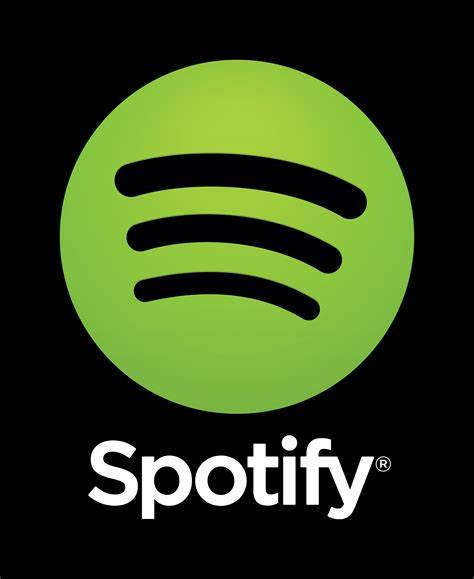

#### Descripción de las variables

* **id**: Identificador único de cada registro


* **name**: Nombre de la canción


* **popularity**: Popularidad


* **duration_ms**: Duracion en microsegundos


* **explicit**: indica si la canción contiene lenguaje explícito (0 = no, 1 = sí) 


* **artists**: Artista/artistas


* **id_artists**: Identificador de los artistas


* **release_date**: fecha de lanzamiento


* **danceability**: Spotify define esta cualidad, que podría ser traducida como bailiabilidad, midiendo cuánto de apta para bailar es la canción, basándose en una combinación de elementos musicales que incluye el tempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general (de 0 a 1).


* **key**:	 tonalidad de la canción (0 = Do, 1 = Do#, 2 = Re, etc.)


* **loudness**:	nivel de sonoridad de la canción en decibelios (dB)


* **mode**: indica si la canción está en modo mayor (1) o menor (0)


* **speechiness**: Por speechiness se entiende la presencia de palabras habladas en el tema. Para pistas totalmente habladas, como un audiolibro, un recital de un poema, etc., el valor de este parámetro se acercará a 1.0.


* **instrumentalness**:	Este parámetro da información sobre la presencia de elementos vocales en la canción. Cuanto más próximo esté este valor a 1.0, mayor probabilidad de que el tema no tenga voces.


* **acousticness**: medida de la presencia de elementos acústicos en la canción (de 0 a 1)


* **tempo**: Velocidad con que se interpreta una composición musical.


* **valence**: es una medida de la positividad o negatividad de una canción. Se define como la medida de la "valencia musical" de una pista, que oscila entre 0 y 1, donde 0 es la pista más triste y 1 es la pista más feliz o alegre.


#### Objetivo

Anticipar los patrones de comportamiento de los usuarios y para ayudar a mejorar el servicio.

#### Contexto Comercial

Este análisis permitirá brindar una visión de posibles problemas y mejoras del servicio para poder ayudar a los artistas a 
saber que tipo de musuica esta mas de moda y por ende sea mas rentable.

#### Problema Comercial 

Algunos problemas comerciales que podrían surgir estan relacionados a musica con baja escuchabilidad en la plataforma lo que puede conllevar a perdidas para el artista. 

#### Contexto Analítico

Inicialmente se realiza un cuestionamiento a partir del objetivo, los problemas y el contexto comercial, dando lugar a las siguientes preguntas:

1. ¿Cúales son las canciones más populares?

2. Analizar las características de las canciones que son más o menos populares para comprender mejor lo que atrae a los usuarios, como el tempo, la energía, la instrumentalización, etc

3. Cuales son los generos musicales mas o menos escuchados

4. que idiomas de las canciones son los mas preferidos

***

>### Exploración y limpieza de los datos

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot
from datetime import timedelta, datetime
import statsmodels.api as sm

#Carga de archivos
os.getcwd()
os.chdir('C:\\Users\\fernando\\Desktop\\JOCE\\DataScience2023\\1ra entrega 14.01.23\\datasets')
df = pd.read_csv('Spoifyartistsandtracks.csv', encoding='latin-1')

#Modificación de los datos
df["release_date"]= pd.to_datetime(df["release_date"])

#Columnas agrgadas
df['year'] = df['release_date'].dt.year


print(df)

display(df.info())

                            id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586666  5rgu12WBIHQtvej2MdHSH0                                  ???   
586667  0NuWgxEp51CutD2pJoF4OM                                blind   
586668  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586669  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586670  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['

None

> ### Análisis y visualizaciones

<Figure size 1000x600 with 0 Axes>

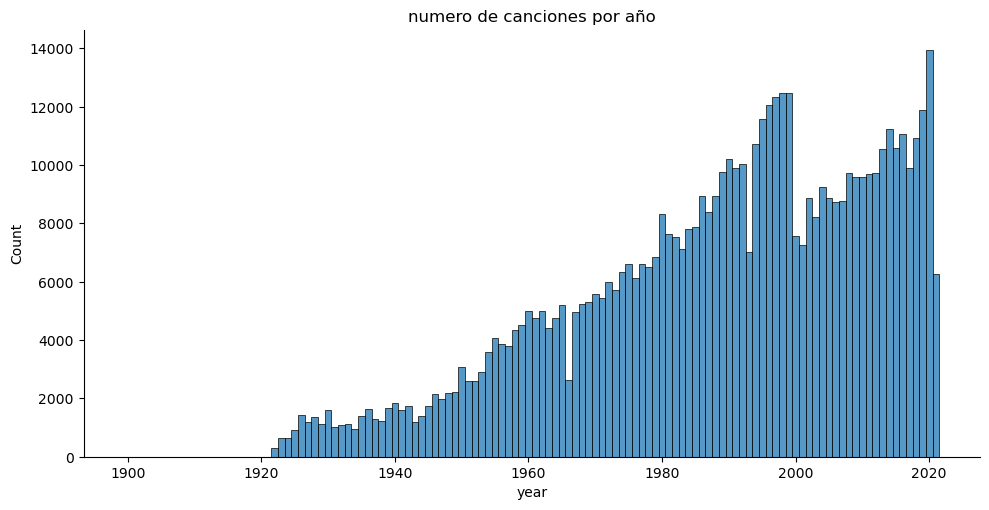

In [58]:
plt.figure(figsize=(10,6))
sns.displot(df['year'], discrete=True, aspect=2, height=5, kind="hist").set(title="numero de canciones por año")

En este grafico podemos ver un aumento en la cantidad de camciones producidas por año

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'key'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'mode'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'acousticness'),
 Text(9.5, 0, 'instrumentalness'),
 Text(10.5, 0, 'liveness'),
 Text(11.5, 0, 'valence'),
 Text(12.5, 0, 'tempo'),
 Text(13.5, 0, 'time_signature')]

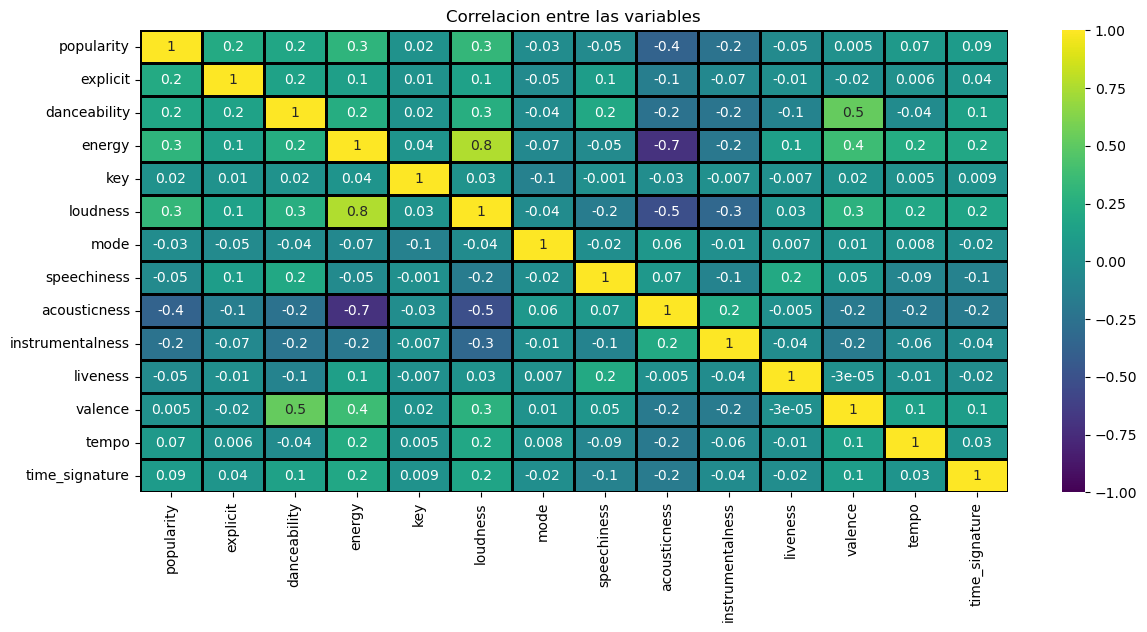

In [66]:
corr_df = df.drop(["duration_ms",'year'],axis=1).corr(method="pearson")
plt.figure(figsize= (14,6))
heatmap= sns.heatmap(corr_df,annot= True,fmt= ".1g", vmin=-1,vmax=1, center=0,cmap="viridis",linewidths=1,linecolor='black')
heatmap.set_title("Correlacion entre las variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

[Text(0.5, 1.0, 'Correlacion entre Loudness vs Energy')]

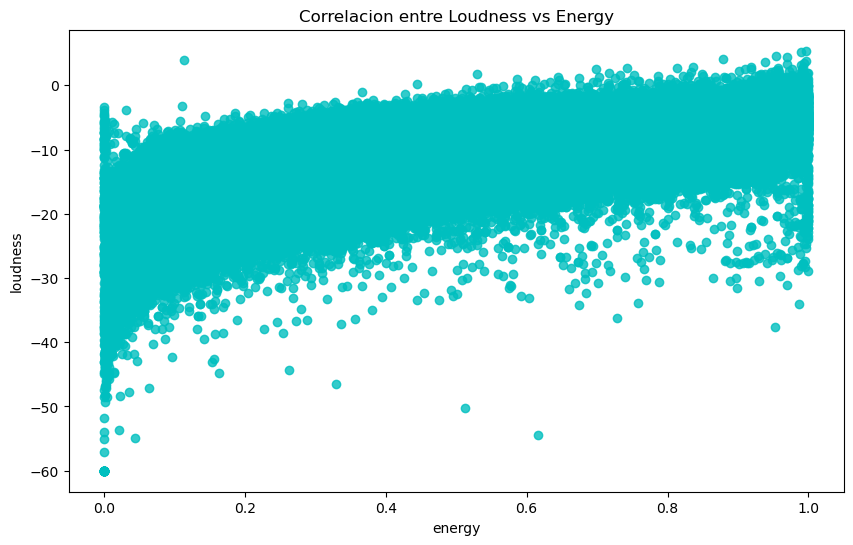

In [67]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, y="loudness", x="energy", color="c").set(title="Correlacion entre Loudness vs Energy")

[Text(0.5, 1.0, 'año vs duración ')]

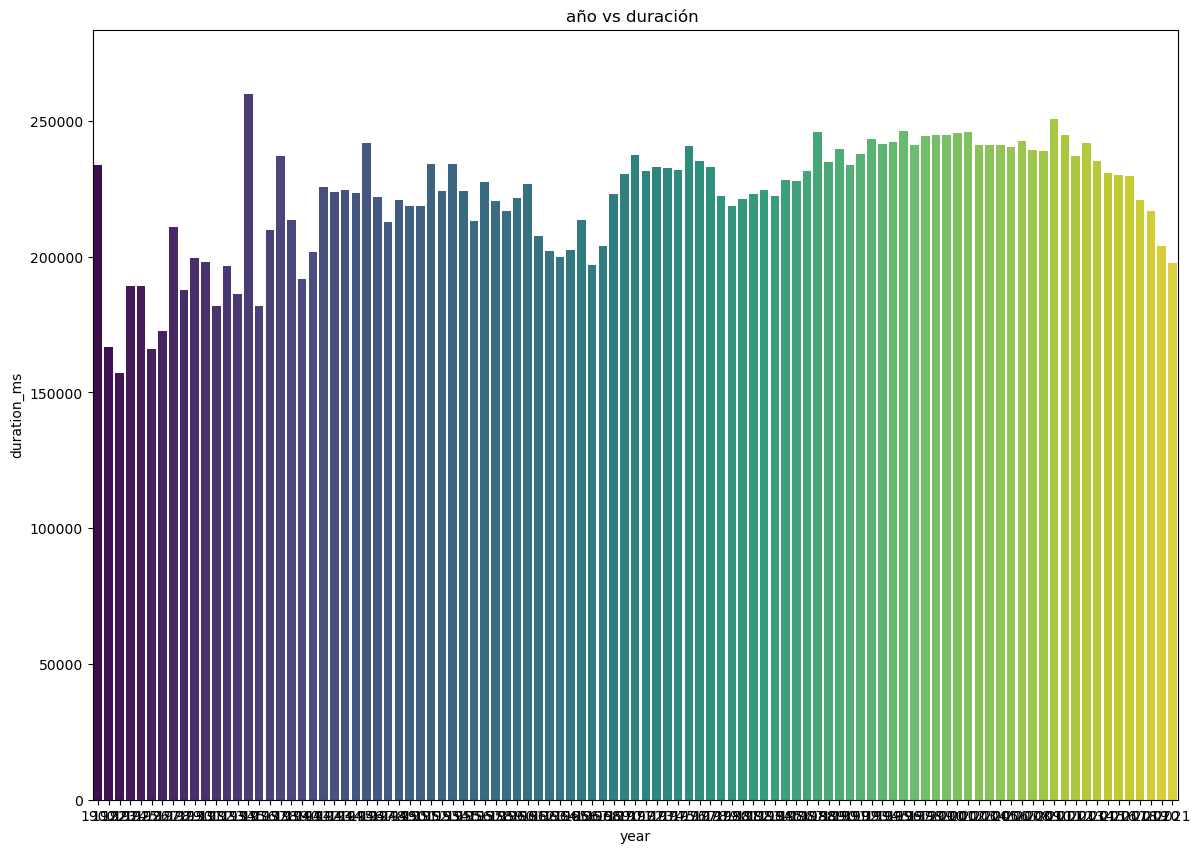

In [65]:
plt.figure(figsize=(14,10))
sns.barplot(x= df['year'], y = df['duration_ms'], errwidth=False, palette="viridis").set(title= "año vs duración ")

In [70]:
from sklearn.linear_model import LinearRegression

# Seleccionar las características que se utilizarán como variables independientes
X = df[['energy']]

# Seleccionar la variable objetivo como variable dependiente
y = df['loudness']

# Separar los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = model.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.5855586019149789
